# Clustering Analysis
The goal of clustering - an unsupervised learning - is to find a natural grouping in data such that items in the same cluster are more similar to each other than those from different clusters. Let's explore following 3:

<ol>
<li> Finding centers of similarity using the popular k-means algorithm
<li> Using a bottom-up approach to build hierarchical cluster trees
<li> Identifying arbitrary shapes of objects using a density-based clustering approach
</ol>

# Two categories of clustering:
<ol>
<li> Prototype-based clustering: means that each cluster is represented by a prototype, which can either be the centroid (average) of similar points with continuous features, or the medoid (the most representative or most frequently occurring point) in the case of categorical features. 
<li> Density based clustering:
</ol>
 
# 1. Prototype-Based: Grouping objects by similarity using k-means
<ol>
<li> k-means algorithm is extremely easy to implement
<li> Its also computationally very efficient compared to other clustering algorithms which might explain its popularity.
<li> It belongs to prototype-based clustering
<li> One of the drawbacks of this clustering algorithm is that we have to specify the number of clusters k a priori. An inappropriate choice for k can result in poor clustering performance. Later in this chapter, we will discuss the elbow method and silhouette plots, which are useful techniques to evaluate the quality of a clustering to help us determine the optimal number of clusters k.
<li> k-means clustering can be applied to data in higher dimensions also
</ol>

# K-Means Algorithm:
<ol>
<li>Randomly pick k centroids from the sample points as initial cluster centers.
<li>Assign each sample to the nearest centroid Grouping objects by similarity using k-means, Grouping objects by similarity using k-means.
<li>Move the centroids to the center of the samples that were assigned to it.
<li>Repeat the steps 2 and 3 until the cluster assignment do not change or a user-defined tolerance or a maximum number of iterations is reached.
</ol>

# How to measure similarity in step-2 (a.k.a Objective Function)
We can define similarity as the opposite of distance, and a commonly used distance for clustering samples with continuous features is the squared Euclidean distance between two points x and y in m-dimensional space. Based on this Euclidean distance metric, we can describe the k-means algorithm as a simple optimization problem, an iterative approach for minimizing the within-cluster sum of squared errors (SSE), which is sometimes also called cluster inertia:

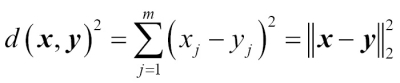

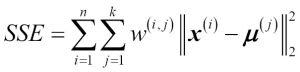

In [7]:
from IPython.display import Image
from IPython.display import display
x1 = Image("/Users/surthi/gitrepos/ml-notes/images/EuclideanDistance.jpg")
x2 = Image("/Users/surthi/gitrepos/ml-notes/images/ClusterIntertia.jpg")
display(x1, x2)

# d(x,y) -> is the euclidean distance (j=1 to m where m=all_feature_dimensions)
# SSE -> WithIn Cluster SquaredSumError [myu -> is centroid of the cluster, w[i,j]=1 if sample x[i] is in cluster j]

# Load sample data

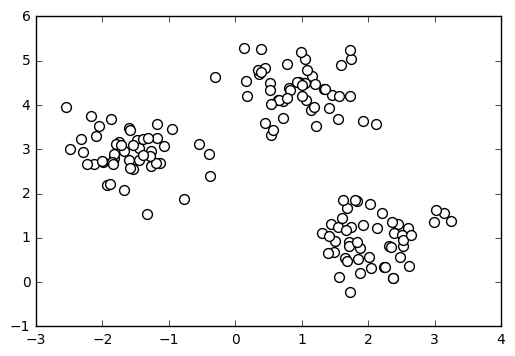

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, 
                      n_features=2, 
                      centers=3,
                      cluster_std=0.5, 
                      shuffle=True, 
                      random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:,0],
            X[:,1], 
            c='white', 
            marker='o', 
            s=50)

plt.show()

[0 1 2]


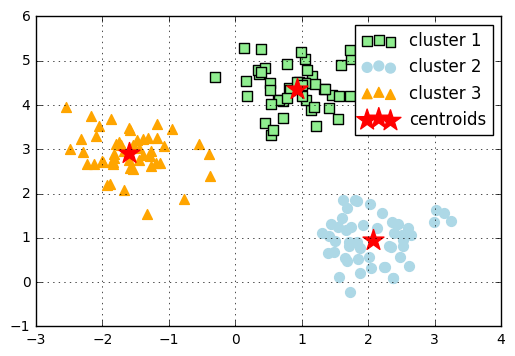

In [19]:
from sklearn.cluster import KMeans
import numpy as np
km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10,
            max_iter=300, 
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0], 
            X[y_km ==0,1], 
            s=50, 
            c='lightgreen', 
            marker='s', 
            label='cluster 1')

plt.scatter(X[y_km==1, 0], X[y_km==1, 1], color='lightblue', s=50, marker='o', label='cluster 2')
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], color='orange', s=50, marker='^', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='red', s=250, marker='*', label='centroids')
plt.legend(loc='best')
plt.grid()
plt.show()
# n_clusters -> we set the number of desired clusters to 3; 
# n_init=10 to run the k-means clustering algorithms 10 times independently with different random centroids
# to choose the final model as the one with the lowest SSE. 
# max_iter -> specify the maximum number of iterations for each single run.
# tol -> controls the tolerance with regard to the changes in the SSE to declare convergence. 
# In the preceding code, we chose a tolerance of 1e-04 (=0.0001).

# KMeans Analysis:
<html>
<h3> Advantage:</h3>
<li> k-means implementation in scikit-learn stops early if it converges before the maximum number of iterations is reached.
<h3>Disadvantage:</h3>
<li>k-means algorithm that uses a random seed to place the initial centroids, which can sometimes result in bad clusterings or slow convergence if the initial centroids are chosen poorly.
<li>one or more clusters can be empty. Note that this problem does not exist for k-medoids or fuzzy C-means.  However, this problem is accounted for in the current k-means implementation in scikit-learn. If a cluster is empty, the algorithm will search for the sample that is farthest away from the centroid of the empty cluster. Then it will reassign the centroid to be this farthest point.

<h3>Solution:</h3>
One way to address this issue is to run the k-means algorithm multiple times on a dataset and choose the best performing model in terms of the SSE. Another strategy is to place the initial centroids far away from each other via the <b>k-means++</b> algorithm
<h1>  KMeans++ </h1>
<h3> Algorithm </h3>
The initialization in k-means++ can be summarized as follows:
<li> Initialize an empty set <b>M</b> to store the k centroids being selected.
<li> Randomly choose the first centroid from the input samples and assign it to <b>M</b>.
<li> For each sample <b>x<i>i</i></b> that is not in  <b>M</b>, find the minimum squared distance <b> d(xi, M)^2 </b> to any of the centroids in <b>M</b>.
<li> To randomly select the next centroid <b>mu</b>, use a weighted probability distribution equal to:
<b>d(mu, M)^2/ Sum(d(xi,M)^2)</b>
<li>Repeat steps 2 and 3 until K-means++ centroids are chosen.
<li>Proceed with the classic k-means algorithm.
</html>

In [30]:
kmplusplus = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10,
            max_iter=300, 
            #tol=1e-04,
            random_state=0)

y_km1 = kmplusplus.fit_predict(X)
print('Distortion: %.2f' % kmplusplus.inertia_)

Distortion: 72.48


# Hard versus soft clustering
<ul>
<li> Hard clustering describes a family of algorithms where each sample in a dataset is assigned to exactly one cluster, as in the k-means 
<li> In contrast, algorithms for soft clustering a.k.a fuzzy clustering assign a sample to one or more clusters, as in the fuzzy C-means (FCM) (also called soft k-means or fuzzy k-means). 
</ul>

# FCM
The FCM procedure is very similar to k-means. However, we replace the hard cluster assignment by probabilities for each point belonging to each cluster. In k-means, we could express the cluster membership of a sample x by a sparse vector of binary values [mu1=0, mu2=1, mu3=0]. The index position with value 1 indicates the cluster centroid [mu1] the sample is assigned to. In FCM, the cluster membeship is expressed as probabilities of membership to the respective cluster centroid [mu1=0.1, mu2=0.85, mu3=0.05]. The sum of the memberships for a given sample is equal to 1.

we can summarize the FCM algorithm in four key steps:
<ol>
<li> Specify the number of k centroids and randomly assign the cluster memberships for each point.
<li> Compute the cluster centroids
<li> Update the cluster memberships for each point.
<li> Repeat steps 2 and 3 until the membership coefficients do not change or a user-defined tolerance or a maximum number of iterations is reached.

<h3> The objective function of FCM looks very similar to the within cluster sum-squared-error that we minimize in k-means: </h3>

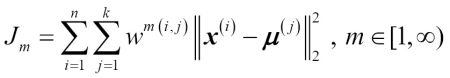

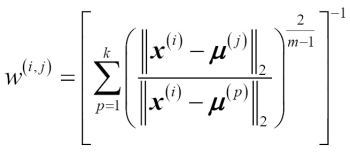

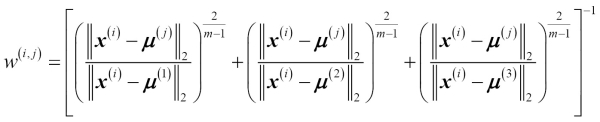

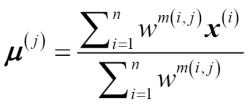

In [23]:
x1 = Image("/Users/surthi/gitrepos/ml-notes/images/FCM.jpg")
x2 = Image("/Users/surthi/gitrepos/ml-notes/images/fcm-membership-function.jpg")
x3 = Image("/Users/surthi/gitrepos/ml-notes/images/fcm-3cluster-membershipfunction.jpg")
x4=Image("/Users/surthi/gitrepos/ml-notes/images/fcm-centroid-calculation.jpg")
display(x1, x2, x3, x4)

<html>
<ul>
<li>Membership Indicator w(i,j) is not binary in FCM. It denotes the cluster membership probability 
<li> Also, w(i,j) now has additional exponent m.
<li> The larger the value of m, the smaller the cluster membership w(i,j) becomes, which leads to fuzzier clusters.
<li> It is intuitive to say that each iteration in FCM is more expensive than an iteration in k-means.
<li> However, FCM typically requires fewer iterations overall to reach convergence. 
<li> Unfortunately, the FCM algorithm is currently not implemented in scikit-learn. 
</ul>
</html>

# Quantifying the quality of clustering - Distortion:

In order to quantify the quality of clustering, we need to use intrinsic metrics—such as the within-cluster SSE (distortion) that we discussed above to compare the performance of different k-means clusterings. Conveniently, we don't need to compute the within-cluster SSE explicitly as it is already accessible via the <b>inertia_</b> attribute after fitting a KMeans model.

# Quantifying the quality of clustering - Elbow Method
Intuitively, we can say that, if k increases, the distortion will decrease. This is because the samples will be closer to the centroids they are assigned to. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly, which will become more clear if we plot distortion for different values of k:


Distortion KM: 27.77
Distortion KM++: 72.48


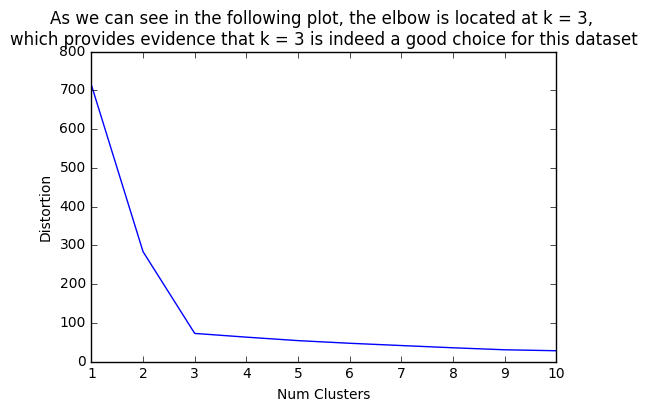

In [35]:
print('Distortion KM: %.2f' % km.inertia_)
print('Distortion KM++: %.2f' % kmplusplus.inertia_)

num_clusters = range(1,11)
distortions = []
for n in num_clusters:
    km = KMeans(n_clusters=n, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(num_clusters, distortions)
plt.xlabel('Num Clusters')
plt.ylabel('Distortion')
plt.title('As we can see in the following plot, the elbow is located at k = 3, \nwhich provides evidence that k = 3 is indeed a good choice for this dataset')
plt.show()

# Quantifying the quality of clustering - silhouette plots
Silhouette analysis can be used as a graphical tool to plot a measure of how tightly grouped the samples in the clusters are. To calculate the silhouette coefficient of a single sample in our dataset, we can apply the following three steps:

<html>
<ol>
<li>Calculate the cluster cohesion a(i) via silhouette plots as the average distance between a sample x(i) and all other points in the same cluster.
<li>Calculate the cluster separation b(i) from the next closest cluster as the average distance between the sample x(i) and all samples in the nearest cluster.
<li>Calculate the silhouette s(i) as the difference between cluster cohesion a(i) and separation b(i) divided by the greater of the two: s(i) = [b(i) - a(i)]/max{b(i), a(i)}
</ol>
</html>

# Some more key notes about silhouette plots
<html>
<ul>
<li>The silhouette coefficient is bounded in the range -1 to 1. 
<li> b(i) quantifies how dissimilar a sample is to other clusters
<li> a(i) tells us how similar it is to the other samples in its own cluster.
<li> Based on the preceding formula, we can see that the silhouette coefficient is 0 if b(i) == a(i)
<li> Furthermore, we get close to an ideal silhouette coefficient of 1 if b(i) >>>> a(i)
<li> Through a visual inspection of the silhouette plot, we can quickly scrutinize the sizes of the different clusters and identify clusters that contain outliers
</ul>

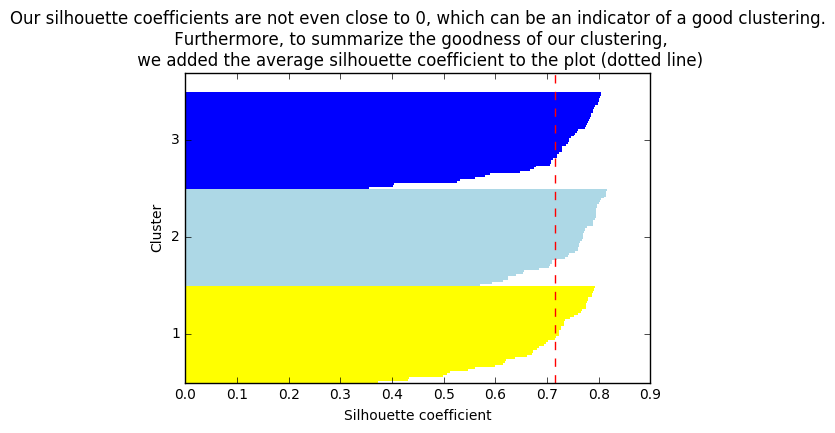

In [42]:
import numpy as np
#from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
cm = ['yellow', 'lightblue', 'blue']
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm[i] #cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals, 
             height=1.0, 
             edgecolor='none', 
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Our silhouette coefficients are not even close to 0, which can be an indicator of a good clustering.\n Furthermore, to summarize the goodness of our clustering,\n we added the average silhouette coefficient to the plot (dotted line)')
plt.show()



# Let's see silhoutte plot for a bad clustering example

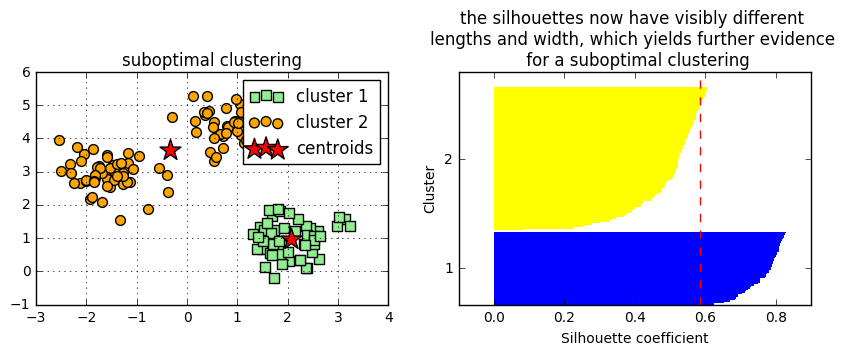

In [69]:
 km = KMeans(n_clusters=2, 
             init='k-means++', 
             n_init=10, 
             max_iter=300,
             tol=1e-04,
             random_state=0)
y_km = km.fit_predict(X)

cm = ['blue', 'yellow']
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm[i]
    ax2.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals, 
             height=1.0, 
             edgecolor='none', 
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
ax2.axvline(silhouette_avg, color="red", linestyle="--") 
ax2.set_yticks(yticks, minor=False)
ax2.set_yticklabels(cluster_labels + 1, minor=False)
ax2.set_ylabel('Cluster')
ax2.set_title('the silhouettes now have visibly different \nlengths and width, which yields further evidence \n for a suboptimal clustering')
ax2.set_xlabel('Silhouette coefficient')
#plt.show()

ax1.scatter(X[y_km==0,0], 
            X[y_km==0,1], 
            s=50, c='lightgreen', 
            marker='s', 
            label='cluster 1')
ax1.scatter(X[y_km==1,0], 
            X[y_km==1,1], 
            s=50, 
            c='orange', 
            marker='o', 
            label='cluster 2')
ax1.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s=250, 
            marker='*', 
            c='red', 
            label='centroids')
ax1.set_title('suboptimal clustering')
ax1.legend(loc='best')
ax1.grid()
plt.show()

Q&A:
    - no diff in distortion for km & km++
    - cm.jet(i / n_clusters) is giving blue color only?? (chk in silhoutte plots)
    - Through a visual inspection of the silhouette plot, we can quickly scrutinize the sizes of the different clusters and identify clusters that contain outliers - HOW?
    - understand avg silhoutte coefficient? how does it help in summarizing goodness offthe cluster?